<a href="https://colab.research.google.com/github/191919201921/OTODOM_WEB_SCRAPER/blob/master/Google_Collab_Projekt_Ko%C5%84cowy_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
#importy
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re
from scipy import stats
import numpy as np

# Tworzenie tabeli z zebranymi ogłoszeniami i analiza danych.

In [270]:
def poczatek():
    url1 = input('Wprowadź link do strony z wynikami Twojego wyszukiwania. Przejdę przez wszystkie dostępne strony. ')
    strona = requests.get(url1)
    soup = bs(strona.text,'lxml')
    
    return soup, url1

#soup, url = poczatek()

In [271]:
soup, url1 = poczatek()

Wprowadź link do strony z wynikami Twojego wyszukiwania. Przejdę przez wszystkie dostępne strony. https://www.otodom.pl/wynajem/mieszkanie/tychy/?search%5Bfilter_float_m%3Ato%5D=50&search%5Bfilter_enum_rooms_num%5D%5B0%5D=2&search%5Bfilter_enum_rooms_num%5D%5B1%5D=3&search%5Bfilter_enum_rooms_num%5D%5B2%5D=1&search%5Bregion_id%5D=12&search%5Bsubregion_id%5D=294&search%5Bcity_id%5D=166


In [272]:
def zakres():    
    p2 = soup.find('form', {"id":'pagerForm'})
    p2 = p2.find_all('a',"")

    strony = []

    for a in p2:
        strona = a.text
        if strona != "":
            strona = int(strona)
            strony.append(strona)
        else:
            pass
    strona_max = max(strony)
    strona_min = min(strony)

    return(strona_min, strona_max)

#strona_min, strona_max = zakres()

In [273]:
strona_min,strona_max = zakres()

In [274]:
# zakomentowane. dla większej liczby rekordów do ML - ściągam oferty z wszystkich stron.
'''
def limit_wyszukiwan(strona_max):

    limit_wyszukiwania = 0
    
    if strona_max > 50:
        limit_wyszukiwania =+ 50
    else:
        limit_wyszukiwania =+ strona_max
    
    return limit_wyszukiwania
'''

'\ndef limit_wyszukiwan(strona_max):\n\n    limit_wyszukiwania = 0\n    \n    if strona_max > 50:\n        limit_wyszukiwania =+ 50\n    else:\n        limit_wyszukiwania =+ strona_max\n    \n    return limit_wyszukiwania\n'

In [275]:
#limit_wyszukiwania = limit_wyszukiwan(strona_max)
#limit_wyszukiwania

In [276]:
'''url = url1+ f'&page=1'
strona = requests.get(url)
soup = bs(strona.text,'lxml')
oferty = soup.find_all('article')
    '''
    

"url = url1+ f'&page=1'\nstrona = requests.get(url)\nsoup = bs(strona.text,'lxml')\noferty = soup.find_all('article')\n    "

In [277]:
#oferty[0].find('li', {'class': "pull-right "}).text.strip()

In [278]:
#oferty[0]

In [279]:
'''
      #wynajmujacy - rozdzielenie osoby prywatnej i pośrednika
            wynajmujacy = oferta.find('ul', {'class': "params-small clearfix hidden-xs"}).text.strip()
            if wynajmujacy == 'Oferta prywatna':
                l_wynajmujacy.append(wynajmujacy)
            else:
                l_wynajmujacy.append('posrednik')
                '''

'\n      #wynajmujacy - rozdzielenie osoby prywatnej i pośrednika\n            wynajmujacy = oferta.find(\'ul\', {\'class\': "params-small clearfix hidden-xs"}).text.strip()\n            if wynajmujacy == \'Oferta prywatna\':\n                l_wynajmujacy.append(wynajmujacy)\n            else:\n                l_wynajmujacy.append(\'posrednik\')\n                '

In [280]:
'''url2 = oferty[0].find_all('a')[0].get('href')

strona2 = requests.get(url2)
soup2 = bs(strona2.text,'lxml')
soup2

czynsz_dod = re.findall(r'\d+',soup2.find_all('div', {'aria-label': 'Czynsz - dodatkowo'})[0].text)
czynsz_dod'''

"url2 = oferty[0].find_all('a')[0].get('href')\n\nstrona2 = requests.get(url2)\nsoup2 = bs(strona2.text,'lxml')\nsoup2\n\nczynsz_dod = re.findall(r'\\d+',soup2.find_all('div', {'aria-label': 'Czynsz - dodatkowo'})[0].text)\nczynsz_dod"

In [281]:
def parametry():
    
    #tworze główny data frame
    df = pd.DataFrame(columns=['tytul','typ','miejsce','pokoje','pietro','pietra_budynku','rok_budowy',
                               'powierzchnia','cena',
                               'czynsz_osobny','kaucja','wynajmujacy','link'])
    
    #listy na wartości z ogłoszeń + tworzenie kolejnych iteracji linku
    for i in range(strona_min,strona_max+1):
        
        l_tytul = []
        l_typ = []
        l_miejsce = []
        l_pokoje = []
        l_powierzchnia = []
        l_cena = []
        l_wynajmujacy = []
        
        
        link_oferta = []
        
        l_czynsz_dod = []
        l_kaucja =[]
        l_pietro = []
        l_pietra = []
        l_rok_bud = []
        
        url = url1+ f'&page={i}'
        strona = requests.get(url)
        soup = bs(strona.text,'lxml')

        oferty = soup.find_all('article')
    
        #pętla ściągania ofert z pojedynczej strony wyszukiwania
        for oferta in oferty:

            

            tytul = oferta.find('span', {"class":"offer-item-title"}).text
            l_tytul.append(tytul)

            typ = oferta.find('span', {"class": "hidden-xs"}).text.strip().rstrip(":")
            l_typ.append(typ)

            miejsce = oferta.find('p', {"class": "text-nowrap"}).text
            miejsce = miejsce[miejsce.find(":",0,-1)+2:]
            l_miejsce.append(miejsce)

            pokoje = int(oferta.find('li', {'class': 'offer-item-rooms hidden-xs'}).text[0])
            l_pokoje.append(pokoje)

            powierzchnia = int(re.findall(r'\d+',oferta.find('li', {"class": "hidden-xs offer-item-area"}).text)[0])
            l_powierzchnia.append(powierzchnia)

            cena = int(re.findall(r'\d+',re.sub(r'\s+','',oferta.find('li', {'class': "offer-item-price"}).text.strip()))[0])
            l_cena.append(cena)
            
            #wynajmujacy - rozdzielenie osoby prywatnej i pośrednika
            wynajmujacy = oferta.find('li', {'class': "pull-right "}).text.strip()
            if wynajmujacy == 'Oferta prywatna':
                l_wynajmujacy.append(wynajmujacy)
            else:
                l_wynajmujacy.append('posrednik')
            
            #url do oferty
            url2 = oferta.find_all('a')[0].get('href')
            link_oferta.append(url2)
            
            #pobieranie danych dodatkowych z strony konkretnego ogłoszenia.
            strona2 = requests.get(url2)
            soup2 = bs(strona2.text,'lxml')

            try:
                pietro = re.findall(r'\d+',soup2.find_all('div', {'aria-label': 'Piętro'})[0].text)
                l_pietro.append(pietro[0])
            except:
                l_pietro.append(0)

            try:
                #czynsz_dod = re.findall(r'\d+',soup2.find_all('div', {'class': 'css-1ytkscc ev4i3ak0'})[0].text)
                #l_czynsz_dod.append(czynsz_dod[0])

                czynsz_dod = soup2.find_all('div',{'aria-label': "Czynsz - dodatkowo"})[0]
                czynsz_dod = re.findall(r'\d+',czynsz_dod.find_all('div', {'class': 'css-1ytkscc ev4i3ak0'})[0].text)
                l_czynsz_dod.append(czynsz_dod[0])
                
            except:
                l_czynsz_dod.append(0)

            try:
                #kaucja = re.findall(r'\d+',soup2.find_all('div', {'aria-label': 'Kaucja'})[0].text.replace(" ",""))
                #l_kaucja.append(kaucja[0])

                kaucja = soup2.find_all('div', {'aria-label': 'Kaucja'})[0]
                kaucja = re.findall(r'\d+',kaucja.find_all('div', {"class" : "css-1ytkscc ev4i3ak0"})[0].text.replace(" ",""))
                l_kaucja.append(kaucja[0])    

            except:
                l_kaucja.append(0)

            try:
                rok_budowy = re.findall(r'\d+',soup2.find_all('div', {'aria-label': 'Rok budowy'})[0].text)
                l_rok_bud.append(rok_budowy[0])
            except:
                l_rok_bud.append('')

            try:
                liczba_pieter = re.findall(r'\d+',soup2.find_all('div', {'aria-label': 'Liczba pięter'})[0].text)
                l_pietra.append(liczba_pieter[0])
            except:
                l_pietra.append(0)

            
        #tworze data frame z jednej strony wyszukiwania
        df1 = pd.DataFrame({'tytul':l_tytul, 
                            "typ":l_typ,
                            "miejsce": l_miejsce,
                            "pokoje": l_pokoje,
                            "pietro": l_pietro,
                            "pietra_budynku": l_pietra,
                            "rok_budowy": l_rok_bud,
                            "powierzchnia": l_powierzchnia,
                            "cena": l_cena,
                            "czynsz_osobny": l_czynsz_dod,
                            "kaucja": l_kaucja,
                            "wynajmujacy": l_wynajmujacy,
                            "link": link_oferta}) 

        
        #dodaję df z jednej strony wyszukiwania do df głównego
        ramki = [df,df1]
        df = pd.concat(ramki)
    
    
    #dopasowuje automatycznie typy danych
    df = df.convert_dtypes()
    
    #wyciągam miasto z tekstu
    df['miasto'] = df['miejsce'].str.split(',').str[0]
    
    #dodaje typy danych kategoryczne + float
    df['miasto'] = df['miasto'].astype('category')
    df['typ'] = df['typ'].astype('category')
    df['miejsce'] = df['miejsce'].astype('category')
    df['wynajmujacy'] = df['wynajmujacy'].astype('category')
    df['cena'] = df['cena'].astype('int64')
    df['czynsz_osobny']= df['czynsz_osobny'].astype('int64')
    df['kaucja'] = df['kaucja'].astype('int64')
    df['pietra_budynku'] = df['pietra_budynku'].astype('int64')
    
    
    #dodaję sumy dla opłat
    df['suma_oplat'] = df[['cena','czynsz_osobny']].sum(axis = 1)
    df['pierwsza_oplata'] = df[['cena','czynsz_osobny','kaucja']].sum(axis = 1)
    
    #zmiana kolejności kolumn
    df = df[['tytul','typ','miasto','miejsce','pokoje','pietro','pietra_budynku','rok_budowy',
             'powierzchnia','cena','czynsz_osobny','kaucja','suma_oplat','pierwsza_oplata',
             'wynajmujacy','link']]
    
    #usuwanie duplikatów wierszy
    df = df.drop_duplicates()
    df = df.reset_index(drop = True)
    
    #usuwanie wartości bardzo odstających z ceny
    df['z_score'] = np.abs(stats.zscore(df['cena'])<3)
    df = df[df['z_score']==True]
    df['z_score'] = np.abs(stats.zscore(df['cena'])>-3)
    df = df[df['z_score']==True]
    
    return df

In [282]:
tabela = parametry()

In [283]:
'''#url = url1+ f'&page=1'
strona = requests.get(url)
soup = bs(strona.text,'lxml')
oferty = soup.find_all('article')
link_oferta = []
l_czynsz_dod = []'''

"#url = url1+ f'&page=1'\nstrona = requests.get(url)\nsoup = bs(strona.text,'lxml')\noferty = soup.find_all('article')\nlink_oferta = []\nl_czynsz_dod = []"

In [284]:
'''
#pobieranie danych dodatkowych z strony konkretnego ogłoszenia.
strona2 = requests.get('https://www.otodom.pl/pl/oferta/do-wynajecia-kawalerka-38m2-ul-cyganerii-34-ID48Qyf.html#975dc63217')
soup2 = bs(strona2.text,'lxml')'''

"\n#pobieranie danych dodatkowych z strony konkretnego ogłoszenia.\nstrona2 = requests.get('https://www.otodom.pl/pl/oferta/do-wynajecia-kawalerka-38m2-ul-cyganerii-34-ID48Qyf.html#975dc63217')\nsoup2 = bs(strona2.text,'lxml')"

In [285]:
'''soup2'''

'soup2'

In [286]:
'''l_kaucja = []'''

'l_kaucja = []'

In [287]:
'''kaucja = soup2.find_all('div', {'aria-label': 'Kaucja'})[0]
kaucja = re.findall(r'\d+',kaucja.find_all('div', {"class" : "css-1ytkscc ev4i3ak0"})[0].text.replace(" ",""))
kaucja[0]'''

'kaucja = soup2.find_all(\'div\', {\'aria-label\': \'Kaucja\'})[0]\nkaucja = re.findall(r\'\\d+\',kaucja.find_all(\'div\', {"class" : "css-1ytkscc ev4i3ak0"})[0].text.replace(" ",""))\nkaucja[0]'

In [288]:
'''kaucja2 =  re.findall(r'\d+',kaucja.find_all('div', {"class" : "css-1ytkscc ev4i3ak0"})[0].text.replace(" ",""))
kaucja2'''

'kaucja2 =  re.findall(r\'\\d+\',kaucja.find_all(\'div\', {"class" : "css-1ytkscc ev4i3ak0"})[0].text.replace(" ",""))\nkaucja2'

In [289]:
'''strona2 = requests.get('https://www.otodom.pl/pl/oferta/4-pory-roku-prywatnie-ID3VAYc.html#baecf81f54')
soup2 = bs(strona2.text,'lxml')'''

"strona2 = requests.get('https://www.otodom.pl/pl/oferta/4-pory-roku-prywatnie-ID3VAYc.html#baecf81f54')\nsoup2 = bs(strona2.text,'lxml')"

In [290]:
'''czynsz_dod = soup2.find_all('div',{'aria-label': "Czynsz - dodatkowo"})[0]
czynsz_dod = re.findall(r'\d+',czynsz_dod.find_all('div', {'class': 'css-1ytkscc ev4i3ak0'})[0].text)
czynsz_dod'''

'czynsz_dod = soup2.find_all(\'div\',{\'aria-label\': "Czynsz - dodatkowo"})[0]\nczynsz_dod = re.findall(r\'\\d+\',czynsz_dod.find_all(\'div\', {\'class\': \'css-1ytkscc ev4i3ak0\'})[0].text)\nczynsz_dod'

In [291]:
'''czynsz_dod = re.findall(r'\d+',czynsz_dod.find_all('div', {'class': 'css-1ytkscc ev4i3ak0'})[0].text)
czynsz_dod'''

"czynsz_dod = re.findall(r'\\d+',czynsz_dod.find_all('div', {'class': 'css-1ytkscc ev4i3ak0'})[0].text)\nczynsz_dod"

In [292]:
'''l_czynsz_dod.append(czynsz_dod[0])'''

'l_czynsz_dod.append(czynsz_dod[0])'

In [293]:
tabela

,tytul,typ,miasto,miejsce,pokoje,pietro,pietra_budynku,rok_budowy,powierzchnia,cena,czynsz_osobny,kaucja,suma_oplat,pierwsza_oplata,wynajmujacy,link,z_score
0,Do wynajęcia kawalerka 38m2 ul Cyganerii 34,Mieszkanie na wynajem,Tychy,"Tychy, C",1,1,3,,38,1400,0,1500,1400,2900,Oferta prywatna,https://www.otodom.pl/pl/oferta/do-wynajecia-k...,True
1,4 Pory Roku /Prywatnie/,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,2014,45,1600,400,2000,2000,4000,Oferta prywatna,https://www.otodom.pl/pl/oferta/4-pory-roku-pr...,True
2,Apartament blisko Browaru Obywatelskiego,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",1,2,2,2018,31,1650,300,1650,1950,3600,Oferta prywatna,https://www.otodom.pl/pl/oferta/apartament-bli...,True
3,"Mieszkanie, 34 m², Tychy",Mieszkanie na wynajem,Tychy,"Tychy, B",1,2,4,,34,1250,0,1250,1250,2500,posrednik,https://www.otodom.pl/pl/oferta/mieszkanie-34-...,True
4,"Mieszkanie, 49,90 m², Tychy",Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,6,18,1980,49,1200,0,2000,1200,3200,posrednik,https://www.otodom.pl/pl/oferta/mieszkanie-49-...,True
5,Najem okazjonalny -Mieszkanie 2 pokojowe,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,9,12,,38,1450,0,1450,1450,2900,Oferta prywatna,https://www.otodom.pl/pl/oferta/najem-okazjona...,True
6,Kawalerka do wynajęcia 36m2 (po remoncie),Mieszkanie na wynajem,Tychy,"Tychy, śląskie",1,2,0,,36,1500,0,1500,1500,3000,Oferta prywatna,https://www.otodom.pl/pl/oferta/kawalerka-do-w...,True
7,"2-pokojowe mieszkanie 38 m2, Cicha, bez pośred...",Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,,38,1400,380,2000,1780,3780,Oferta prywatna,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,True
8,Tychy Żwaków od natychmiast,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",2,3,4,2020,40,2000,300,2000,2300,4300,Oferta prywatna,https://www.otodom.pl/pl/oferta/tychy-zwakow-o...,True
9,"Mieszkanie, 48 m², Tychy",Mieszkanie na wynajem,Tychy,"Tychy, B",2,0,4,,48,1400,0,0,1400,1400,posrednik,https://www.otodom.pl/pl/oferta/mieszkanie-48-...,True


In [294]:
tabela.dtypes

tytul                string
typ                category
miasto             category
miejsce            category
pokoje                Int64
pietro               object
pietra_budynku        int64
rok_budowy           string
powierzchnia          Int64
cena                  int64
czynsz_osobny         int64
kaucja                int64
suma_oplat            int64
pierwsza_oplata       int64
wynajmujacy        category
link                 string
z_score                bool
dtype: object

In [295]:
wykres_box = px.box(tabela, y = "suma_oplat")
wykres_box

In [296]:
tabela.to_excel('oferty.xlsx')

# Analiza i tabele

In [297]:
#importy bibliotek
import plotly.express as px


In [298]:
#podsumowanie zebranych ofert

def podsumowanie_ofert():
    
    #podsu = tabela.groupby(['miasto','pokoje']).count().reset_index()
    
    podsu = tabela.groupby(['miasto','pokoje']).agg({'cena':['mean', 'max', 'min'],
                         'suma_oplat':['mean','max','min'],
                         'powierzchnia':'mean', 
                         'tytul':'count'})
    
    print("Podsumowanie ofert z Twojego wyszukiwania OTODOM: ")
    
    return podsu

In [299]:
podsumowanie = podsumowanie_ofert()
podsumowanie

Podsumowanie ofert z Twojego wyszukiwania OTODOM: 


cena              ... suma_oplat powierzchnia tytul
                      mean   max   min  ...        min         mean count
miasto pokoje                           ...                              
Tychy  1       1342.222222  1650   950  ...       1100    33.777778     9
       2       1572.107143  2000  1200  ...       1200    41.928571    28
       3       2000.000000  2000  2000  ...       2400    50.000000     1

[3 rows x 8 columns]

## Wykresy

In [300]:
oferty_miasto = tabela.groupby('miasto').count()
oferty_miasto['liczba_ofert'] = oferty_miasto['tytul']
oferty_miasto = oferty_miasto.reset_index()[['miasto','tytul']]
oferty_miasto.columns = ['miasto','liczba_ofert']
oferty_miasto

of_miasto_wykres = px.pie(oferty_miasto,
                         values = 'liczba_ofert',
                         names = 'miasto',
                         labels  = 'miasto',
                         title = "Liczba ofert w danym mieście."
                         )

of_miasto_wykres

In [301]:
powierzchnia_miasto = px.bar(tabela,
                      y = 'powierzchnia',
                      x = 'miasto',
                      title = 'Dostępna powierzchnia z Twojego wyszukiwania wg. miasta. [m2]',
                      color = 'miasto'
                      )
powierzchnia_miasto.show()

In [302]:
pokoje_box = px.box(tabela, 
                    y = 'cena',
                    points = 'all',
                   
                    title = 'Rozrzut wszystkich ofert wg. ceny.- przybliż wykres w interesujące miejsce'
                   )
pokoje_box

In [303]:
type(tabela['powierzchnia'])

pandas.core.series.Series

In [ ]:
list(tabela['cena'])

In [305]:
powierzchnia_cena_scatter = px.scatter(tabela,
                           y = 'cena',
                           x = 'powierzchnia',
                           title = 'Rozrzut cenowy ofert.', 
                           color = 'miasto')

powierzchnia_cena_scatter

In [306]:
cena_pokoje_box = px.box(tabela,
                                y = 'cena',
                                x = 'pokoje',
                                color = 'miasto',
                                title = 'Rozrzut cenowy ofert (wg l.pokojów)')

cena_pokoje_box

In [307]:


suma_oplat_box = px.box(tabela,
                                y = 'suma_oplat',
                                x = 'pokoje',
                                color = 'miasto',
                                title = 'Rozrzut cenowy pełnej opłaty per msc (wg l.pokojów)')

suma_oplat_box

In [308]:
powierzchnia_suma_oplat_scatter = px.scatter(tabela,
                           y = 'suma_oplat',
                           x = 'powierzchnia',
                           title = 'Rozrzut sum oplat za mieszkanie.', 
                           color = 'miasto')

powierzchnia_suma_oplat_scatter

In [309]:
tabela_kaucja = tabela[tabela['kaucja']>0]

kaucja_box = px.box(tabela_kaucja,
                                y = 'kaucja',
                                x = 'pokoje',
                                color = 'miasto',
                                title = 'Rozrzut cenowy kaucji wstepnej')

kaucja_box

In [310]:
pierwsza_oplata_box = px.box(tabela,
                                y = 'pierwsza_oplata',
                                x = 'pokoje',
                                color = 'miasto',
                                title = 'Rozrzut cenowy pierwszej oplaty')

pierwsza_oplata_box

In [311]:
kaucja_box_wynajmujacy = px.box(tabela_kaucja,
                                y = 'kaucja',
                                x = 'pokoje',
                                color = 'wynajmujacy',
                                title = 'Rozrzut cenowy kaucji wstepnej wg. wynajmującego')

kaucja_box_wynajmujacy

In [312]:
czynsz_dodatkowy = tabela[tabela['czynsz_osobny']>10]

czynsz_osobny = px.box(czynsz_dodatkowy,
                                y = 'czynsz_osobny',
                                x = 'pokoje',
                                color = 'miasto',
                                title = 'Rozrzut czynszu (nie wliczonego do ceny z ogloszenia)')

czynsz_osobny

In [313]:
czynsz_dodatkowy

,tytul,typ,miasto,miejsce,pokoje,pietro,pietra_budynku,rok_budowy,powierzchnia,cena,czynsz_osobny,kaucja,suma_oplat,pierwsza_oplata,wynajmujacy,link,z_score
1,4 Pory Roku /Prywatnie/,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,2014,45,1600,400,2000,2000,4000,Oferta prywatna,https://www.otodom.pl/pl/oferta/4-pory-roku-pr...,True
2,Apartament blisko Browaru Obywatelskiego,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",1,2,2,2018,31,1650,300,1650,1950,3600,Oferta prywatna,https://www.otodom.pl/pl/oferta/apartament-bli...,True
7,"2-pokojowe mieszkanie 38 m2, Cicha, bez pośred...",Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,,38,1400,380,2000,1780,3780,Oferta prywatna,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,True
8,Tychy Żwaków od natychmiast,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",2,3,4,2020,40,2000,300,2000,2300,4300,Oferta prywatna,https://www.otodom.pl/pl/oferta/tychy-zwakow-o...,True
11,Komfortowe mieszkanie 2 pokojowe w Tychach Żwaków,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",2,3,5,2020,38,1500,330,3000,1830,4830,Oferta prywatna,https://www.otodom.pl/pl/oferta/komfortowe-mie...,True
16,M-3 w nowym budownictwie z klimatyzacją - wyna...,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,,40,1800,300,2000,2100,4100,posrednik,https://www.otodom.pl/pl/oferta/m-3-w-nowym-bu...,True
20,WYSOKI Standard -Mieszkanie WYNAJEM-Tychy Żwaków,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",3,1,5,2019,50,2000,400,3000,2400,5400,posrednik,https://www.otodom.pl/pl/oferta/wysoki-standar...,True
21,NOWE mieszkanie-WYSOKI STANDARD- od zaraz,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",2,1,5,2019,42,1600,400,3000,2000,5000,posrednik,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,True
25,"2-pokojowe mieszkanie 38 m2, Cicha, bez pośred...",Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,,38,1400,380,2000,1780,3780,Oferta prywatna,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,True
26,Tychy Żwaków od natychmiast,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",2,3,4,2020,40,2000,300,2000,2300,4300,Oferta prywatna,https://www.otodom.pl/pl/oferta/tychy-zwakow-o...,True


In [314]:
czynsz_osobny_wynajmujacy = px.box(czynsz_dodatkowy,
                                y = 'czynsz_osobny',
                                x = 'pokoje',
                                color = 'wynajmujacy',
                                title = 'Rozrzut czynszu (nie wliczonego do ceny z ogloszenia)')

czynsz_osobny_wynajmujacy

In [315]:
oferty_z_dodat_czynszem = tabela[tabela['czynsz_osobny']>0]
print(f'Ogłoszenia które na stronie głównej podają cenę bez czynszu: {len(oferty_z_dodat_czynszem)}')

oferty_czynsz_wliczony = tabela[tabela['czynsz_osobny']==0]
print(f'Ogłoszenia które podają cenę z już wliczonym czynszem: {len(oferty_czynsz_wliczony)}')

Ogłoszenia które na stronie głównej podają cenę bez czynszu: 13
Ogłoszenia które podają cenę z już wliczonym czynszem: 25


In [316]:
#wyrzucenie z pamięci niepotrzebnych tabel:
del oferty_z_dodat_czynszem
del oferty_czynsz_wliczony

del czynsz_osobny_wynajmujacy
del czynsz_dodatkowy
del tabela_kaucja
del oferty_miasto
del of_miasto_wykres
del podsumowanie

# Próba utworzenia modelu machine learning

## Scikit learn - Elastic Net

Wybór modelu do wykorzystania.
![Inkedml_map_scikit_learn_LI.jpg](attachment:Inkedml_map_scikit_learn_LI.jpg)
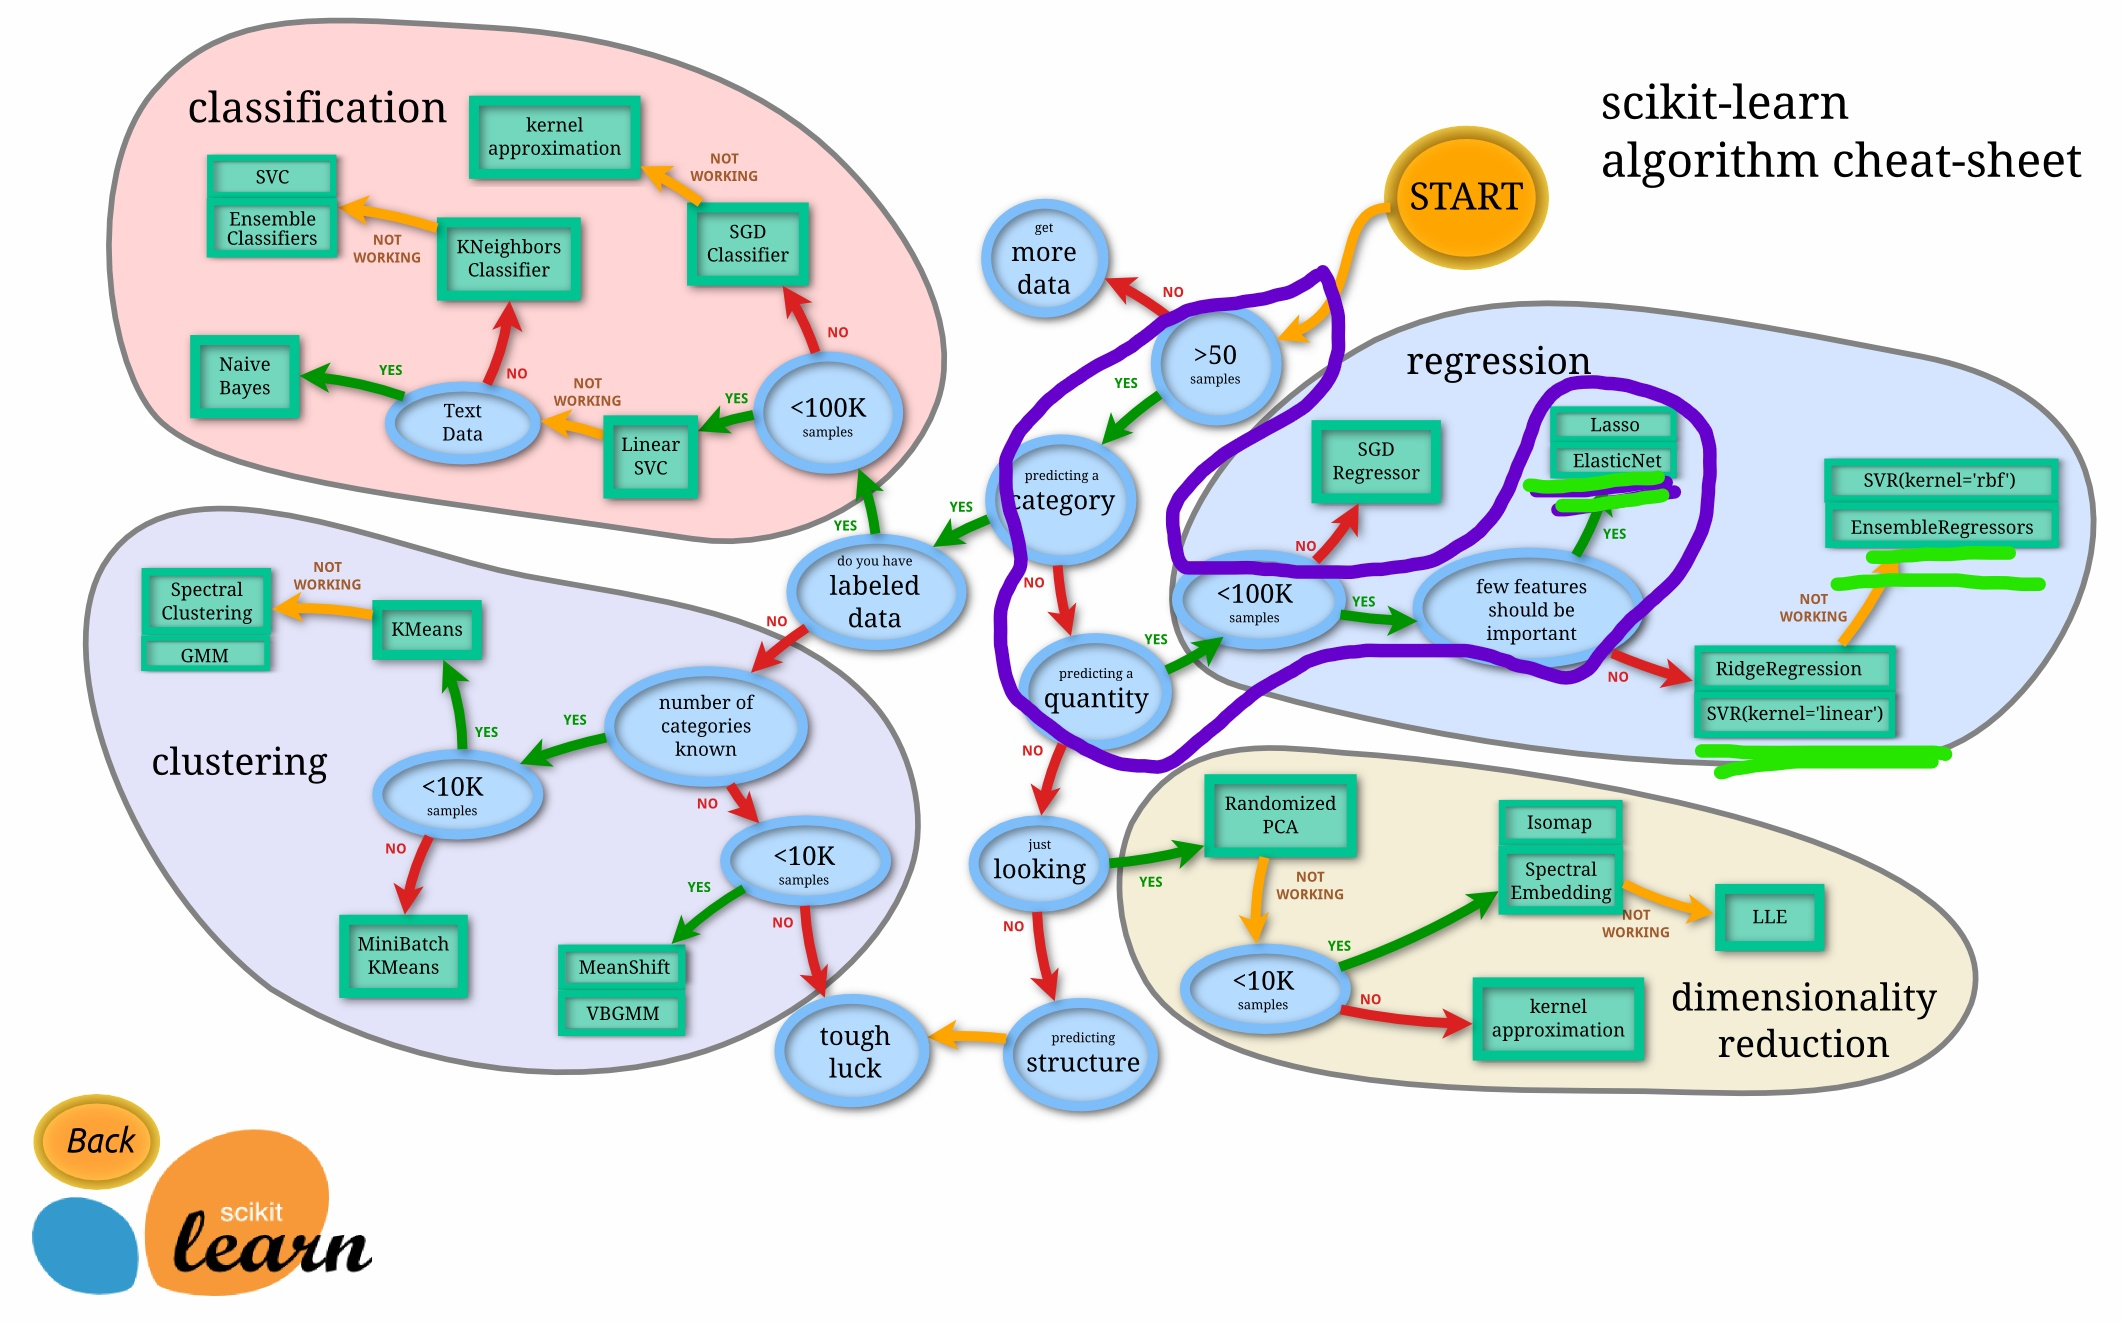
Wygląda na to że Lass/Elastic Net powinno byc ok.

In [317]:
tabela

,tytul,typ,miasto,miejsce,pokoje,pietro,pietra_budynku,rok_budowy,powierzchnia,cena,czynsz_osobny,kaucja,suma_oplat,pierwsza_oplata,wynajmujacy,link,z_score
0,Do wynajęcia kawalerka 38m2 ul Cyganerii 34,Mieszkanie na wynajem,Tychy,"Tychy, C",1,1,3,,38,1400,0,1500,1400,2900,Oferta prywatna,https://www.otodom.pl/pl/oferta/do-wynajecia-k...,True
1,4 Pory Roku /Prywatnie/,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,2014,45,1600,400,2000,2000,4000,Oferta prywatna,https://www.otodom.pl/pl/oferta/4-pory-roku-pr...,True
2,Apartament blisko Browaru Obywatelskiego,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",1,2,2,2018,31,1650,300,1650,1950,3600,Oferta prywatna,https://www.otodom.pl/pl/oferta/apartament-bli...,True
3,"Mieszkanie, 34 m², Tychy",Mieszkanie na wynajem,Tychy,"Tychy, B",1,2,4,,34,1250,0,1250,1250,2500,posrednik,https://www.otodom.pl/pl/oferta/mieszkanie-34-...,True
4,"Mieszkanie, 49,90 m², Tychy",Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,6,18,1980,49,1200,0,2000,1200,3200,posrednik,https://www.otodom.pl/pl/oferta/mieszkanie-49-...,True
5,Najem okazjonalny -Mieszkanie 2 pokojowe,Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,9,12,,38,1450,0,1450,1450,2900,Oferta prywatna,https://www.otodom.pl/pl/oferta/najem-okazjona...,True
6,Kawalerka do wynajęcia 36m2 (po remoncie),Mieszkanie na wynajem,Tychy,"Tychy, śląskie",1,2,0,,36,1500,0,1500,1500,3000,Oferta prywatna,https://www.otodom.pl/pl/oferta/kawalerka-do-w...,True
7,"2-pokojowe mieszkanie 38 m2, Cicha, bez pośred...",Mieszkanie na wynajem,Tychy,"Tychy, śląskie",2,3,4,,38,1400,380,2000,1780,3780,Oferta prywatna,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,True
8,Tychy Żwaków od natychmiast,Mieszkanie na wynajem,Tychy,"Tychy, Żwaków",2,3,4,2020,40,2000,300,2000,2300,4300,Oferta prywatna,https://www.otodom.pl/pl/oferta/tychy-zwakow-o...,True
9,"Mieszkanie, 48 m², Tychy",Mieszkanie na wynajem,Tychy,"Tychy, B",2,0,4,,48,1400,0,0,1400,1400,posrednik,https://www.otodom.pl/pl/oferta/mieszkanie-48-...,True


In [318]:
#kolumny do uzupełnienia
# - pietra budynku

#do usunięcia
# - rok_budowy - za dużo pustych
# - tytul
# - miejsce
# - kolumny związane z sumą opłat - cena, czynsz osobny, kaucja, pierwsza oplata

df_model = tabela[['miasto','pokoje','pietro','pietra_budynku',
                   'powierzchnia','wynajmujacy','suma_oplat']]

In [319]:
#tabela do modelu
df_model

,miasto,pokoje,pietro,pietra_budynku,powierzchnia,wynajmujacy,suma_oplat
0,Tychy,1,1,3,38,Oferta prywatna,1400
1,Tychy,2,3,4,45,Oferta prywatna,2000
2,Tychy,1,2,2,31,Oferta prywatna,1950
3,Tychy,1,2,4,34,posrednik,1250
4,Tychy,2,6,18,49,posrednik,1200
5,Tychy,2,9,12,38,Oferta prywatna,1450
6,Tychy,1,2,0,36,Oferta prywatna,1500
7,Tychy,2,3,4,38,Oferta prywatna,1780
8,Tychy,2,3,4,40,Oferta prywatna,2300
9,Tychy,2,0,4,48,posrednik,1400


In [320]:
from sklearn import preprocessing
from sklearn import compose
from sklearn import covariance
from sklearn import impute
from sklearn import model_selection
from sklearn import metrics

In [321]:
df_model.dtypes

miasto            category
pokoje               Int64
pietro              object
pietra_budynku       int64
powierzchnia         Int64
wynajmujacy       category
suma_oplat           int64
dtype: object

### czyszczenie danych do modelu

In [322]:
#uzupełnienie braków dla kolumny pietro

srednie_pietro = sum(list(df_model[df_model['pietra_budynku']>0]['pietra_budynku']))/len(list(df_model[df_model['pietra_budynku']>0]['pietra_budynku']))
srednie_pietro

5.305555555555555

In [323]:
df_model.loc[df_model['pietra_budynku']==0, 'pietra_budynku'] = srednie_pietro

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
df_model

,miasto,pokoje,pietro,pietra_budynku,powierzchnia,wynajmujacy,suma_oplat
0,Tychy,1,1,3.000000,38,Oferta prywatna,1400
1,Tychy,2,3,4.000000,45,Oferta prywatna,2000
2,Tychy,1,2,2.000000,31,Oferta prywatna,1950
3,Tychy,1,2,4.000000,34,posrednik,1250
4,Tychy,2,6,18.000000,49,posrednik,1200
5,Tychy,2,9,12.000000,38,Oferta prywatna,1450
6,Tychy,1,2,5.305556,36,Oferta prywatna,1500
7,Tychy,2,3,4.000000,38,Oferta prywatna,1780
8,Tychy,2,3,4.000000,40,Oferta prywatna,2300
9,Tychy,2,0,4.000000,48,posrednik,1400


In [325]:
df_model['miasto']

0     Tychy
1     Tychy
2     Tychy
3     Tychy
4     Tychy
5     Tychy
6     Tychy
7     Tychy
8     Tychy
9     Tychy
10    Tychy
11    Tychy
12    Tychy
13    Tychy
14    Tychy
16    Tychy
17    Tychy
18    Tychy
19    Tychy
20    Tychy
21    Tychy
22    Tychy
23    Tychy
24    Tychy
25    Tychy
26    Tychy
27    Tychy
28    Tychy
29    Tychy
30    Tychy
32    Tychy
33    Tychy
34    Tychy
35    Tychy
36    Tychy
37    Tychy
38    Tychy
39    Tychy
Name: miasto, dtype: category
Categories (1, object): ['Tychy']

## Kodowanie zmiennych kategorycznych i podzial na zbory x,y


In [327]:
#zakodowanie zmiennych kategorycznych dla miasto i wynajmujacy. - przeksztalcenie na wartosci liczbowe

df_model = pd.get_dummies(df_model,columns=['miasto','wynajmujacy'],prefix_sep = "_")

In [328]:
#podział na zbiór testowy i uczący

x_train, x_test, y_train, y_test = model_selection.train_test_split(df_model.drop(columns='suma_oplat'),
                                                                   df_model['suma_oplat'],
                                                                   test_size = .3,
                                                                   random_state = 99)

In [329]:
x_train

,pokoje,pietro,pietra_budynku,powierzchnia,miasto_Tychy,wynajmujacy_Oferta prywatna,wynajmujacy_posrednik
7,2,3,4.000000,38,1,1,0
23,1,2,2.000000,37,1,0,1
38,1,0,5.305556,29,1,0,1
35,2,2,4.000000,37,1,0,1
27,2,1,3.000000,50,1,0,1
8,2,3,4.000000,40,1,1,0
12,2,2,4.000000,39,1,0,1
0,1,1,3.000000,38,1,1,0
2,1,2,2.000000,31,1,1,0
33,2,1,2.000000,48,1,0,1


In [330]:
y_train

7     1780
23    1350
38    1100
35    1300
27    1550
8     2300
12    1550
0     1400
2     1950
33    1600
11    1830
6     1500
17    1690
32    1700
18    1450
30    1501
3     1250
24    1400
39    1600
21    2000
5     1450
4     1200
19    1399
9     1400
37    1500
1     2000
Name: suma_oplat, dtype: int64

In [331]:
kolumny = pd.Index(df_model.columns).tolist()
kolumny

['pokoje',
 'pietro',
 'pietra_budynku',
 'powierzchnia',
 'suma_oplat',
 'miasto_Tychy',
 'wynajmujacy_Oferta prywatna',
 'wynajmujacy_posrednik']

In [332]:
wykres_korelacji = px.scatter_matrix(df_model, dimensions = kolumny, color = "suma_oplat")
wykres_korelacji.update_layout(autosize = False, width = 1300, height = 1000)

In [333]:
#linear model - elastic net
from sklearn.linear_model import ElasticNet

In [334]:
#wybranie algorytmu
algorytm = ElasticNet(random_state=1)

In [335]:
#zastosowanie algorytmu na zbiorach uczących
algorytm.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

In [336]:
#predykcja danych na podstawie zbioru testowego x

predykcja = algorytm.predict(x_test)
predykcja

array([1336.28550059, 1050.87960763, 1200.41213671, 1437.41614938,
       1533.89560605, 1575.51861454, 1635.97915749, 1685.99987784,
       1708.21240578, 1575.51861454, 1307.90518035, 1550.06029048])

In [337]:
#ocena algorytmu na podstawie danych testowych

algorytm.score(x_test,y_test)

-0.816732478762225

In [338]:
# ocena metodą r2 
print(metrics.r2_score(y_test, predykcja))

-0.816732478762225


In [339]:
#średni błąd absolutny - średnia błędów. 
print(metrics.mean_absolute_error(y_test, predykcja))

345.1457631148078


In [340]:
x = pd.DataFrame()
x['predykcja'] = predykcja

In [341]:
#tworzę tabelę z wartościami prawdziwymi z zbioru testowego (suma_oplat) i wartosciami predykowanymi.
#obliczam błąd dla kazdej linii.

x['suma_oplat'] = y_test.reset_index()['suma_oplat']
x['predykcja'] = x['predykcja'].astype('int')
x['suma_oplat'] = x['suma_oplat'].astype('int')
x['blad_prognozy'] = x['suma_oplat'] - x['predykcja']
x

,predykcja,suma_oplat,blad_prognozy
0,1336,1550,214
1,1050,1480,430
2,1200,1890,690
3,1437,1375,-62
4,1533,1800,267
5,1575,1800,225
6,1635,2400,765
7,1685,1780,95
8,1708,2300,592
9,1575,2100,525


In [342]:
#ocena modelu metodą r2 z walidacją krosową.

model_selection.cross_val_score(algorytm, 
                                x_test, 
                                y_test, 
                                scoring = "r2",
                                n_jobs=-1).mean()

-103.70617725881371

## Bayesian Ridge

In [343]:
from sklearn.linear_model import BayesianRidge

In [344]:
algorytm2 = BayesianRidge(compute_score = True)

In [345]:
algorytm2.fit(x_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [346]:
predykcja2 = algorytm2.predict(x_test)
predykcja2

array([1567.26282983, 1567.23907289, 1567.28592274, 1567.29081895,
       1567.30455109, 1567.30792557, 1567.33822814, 1567.30290023,
       1567.3095737 , 1567.30792557, 1567.3032043 , 1567.31157282])

In [347]:
model_selection.cross_val_score(algorytm2, 
                                x_test, 
                                y_test, 
                                scoring = "r2",
                                n_jobs=-1).mean()

-96.4906940613375

In [348]:
x2 = pd.DataFrame()
x2['predykcja'] = predykcja2
x2['suma_oplat'] = y_test.reset_index()['suma_oplat']
x2['błąd_predykcji'] = x2['predykcja'] - x2['suma_oplat']
x2

,predykcja,suma_oplat,błąd_predykcji
0,1567.262830,1550,17.262830
1,1567.239073,1480,87.239073
2,1567.285923,1890,-322.714077
3,1567.290819,1375,192.290819
4,1567.304551,1800,-232.695449
5,1567.307926,1800,-232.692074
6,1567.338228,2400,-832.661772
7,1567.302900,1780,-212.697100
8,1567.309574,2300,-732.690426
9,1567.307926,2100,-532.692074


In [349]:
print(metrics.r2_score(y_test, predykcja2))

-0.5658174548214239


In [350]:
model_selection.cross_val_score(algorytm2, 
                                x_test, 
                                y_test, 
                                scoring = "r2",
                                n_jobs=-1).mean()

-96.4906940613375

In [351]:
print(metrics.mean_absolute_error(y_test, predykcja2))

286.30227717592777


In [352]:
x2['błąd_predykcji'].mean()

-233.9529561807897